# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Mancini

Student name: Lorenzo
    
ID: 2019098

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm
import pandas as pd

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2019098# place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [62 65 64 58 58 63 64 54 64 48]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


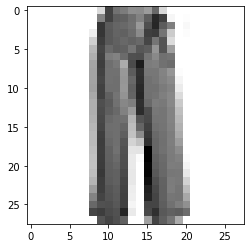

LABEL: 1
INPUT:


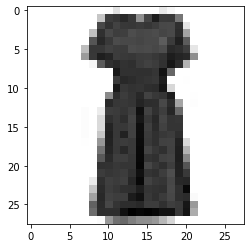

LABEL: 3
INPUT:


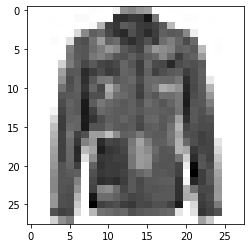

LABEL: 6
INPUT:


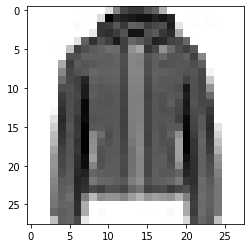

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

lin_est_obj = SVC(kernel = "linear")
linear = GridSearchCV( estimator = lin_est_obj, param_grid = parameters, cv = 4)
linear.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", linear.best_params_ )


print("Score with best parameters:", linear.best_score_)


print("\nAll scores on the grid:")
all_scores = pd.DataFrame(linear.cv_results_, 
                  columns = ["param_C", "mean_test_score"])  
display(all_scores)


RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.7683333333333333

All scores on the grid:


,param_C,mean_test_score
0,0.001,0.585000
1,0.01,0.746667
2,0.1,0.768333
3,1,0.756667
4,10,0.756667
5,100,0.756667


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

pol2_est_obj = SVC(kernel = "poly", degree = 2)
pol2 = GridSearchCV(estimator = pol2_est_obj, 
                               param_grid = parameters, cv = 4)
pol2.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", pol2.best_params_)


print("Score with best parameters:", pol2.best_score_)


print("\nAll scores on the grid:")
all_scores = pd.DataFrame(pol2.cv_results_, 
                  columns = ["param_C", "param_gamma", "mean_test_score"])  
display(all_scores)

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.7633333333333333

All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.05,0.05,0.743333
1,0.05,0.5,0.763333
2,0.05,5,0.763333
3,0.5,0.05,0.760000
4,0.5,0.5,0.763333
5,0.5,5,0.763333
6,5,0.05,0.763333
7,5,0.5,0.763333
8,5,5,0.763333


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
deg = 4

pol4_est_obj = SVC(kernel = "poly", degree = deg)
pol4 = GridSearchCV(estimator = pol4_est_obj, 
                               param_grid = parameters, cv = 4)
pol4.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', deg, ' KERNEL')

print("Best parameters set found:", pol4.best_params_)

print("Score with best parameters:", pol4.best_score_)

print("\nAll scores on the grid:")
all_scores = pd.DataFrame(pol4.cv_results_, 
                  columns = ["param_C", "param_gamma", "mean_test_score"])  
display(all_scores)

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.05}
Score with best parameters: 0.7033333333333334

All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.05,0.05,0.703333
1,0.05,0.5,0.696667
2,0.05,5,0.696667
3,0.5,0.05,0.701667
4,0.5,0.5,0.696667
5,0.5,5,0.696667
6,5,0.05,0.693333
7,5,0.5,0.696667
8,5,5,0.696667


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

radbas_est_obj = SVC(kernel = "rbf" )
radbas = GridSearchCV(estimator = radbas_est_obj,
                                 param_grid = parameters, cv = 4)
radbas.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", radbas.best_params_)

print("Score with best parameters:", radbas.best_score_)

print("\nAll scores on the grid:")
all_scores = pd.DataFrame(radbas.cv_results_, 
                  columns = ["param_C", "param_gamma", "mean_test_score"])  
display(all_scores)

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 50, 'gamma': 0.005}
Score with best parameters: 0.79

All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.5,0.005,0.736667
1,0.5,0.05,0.683333
2,0.5,0.5,0.108333
3,0.5,5,0.131667
4,5,0.005,0.788333
5,5,0.05,0.760000
6,5,0.5,0.140000
7,5,5,0.106667
8,50,0.005,0.790000
9,50,0.05,0.760000


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset?

### Answer: 
We can notice that the score slightly decreases as the polynomial degree increases. Anyhow, the scores do not differ too much: the values are in the range between $0.70$ and $0.79$. The best result is obtained with the radial basis function with $C = 50$ and $\gamma = 0.005$.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C = 50, kernel = "rbf", gamma = 0.005)
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.203250


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1 - train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1 - test_error))
    
    plt.show()

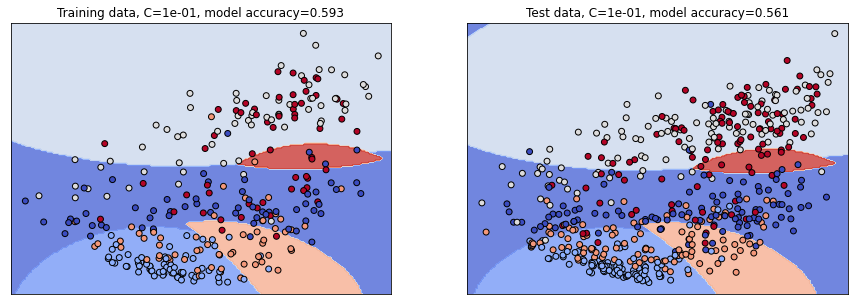

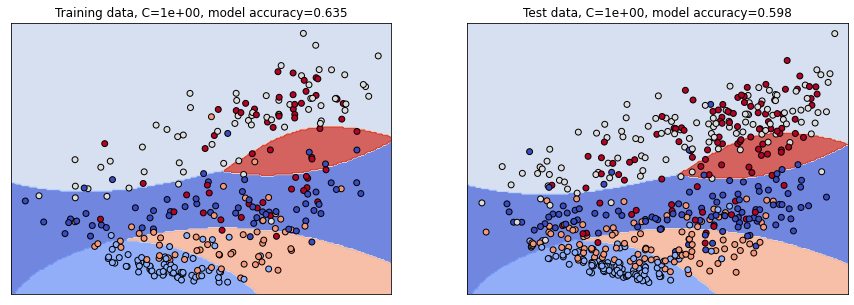

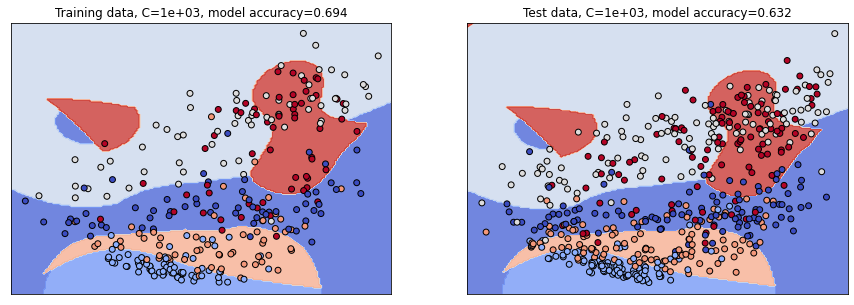

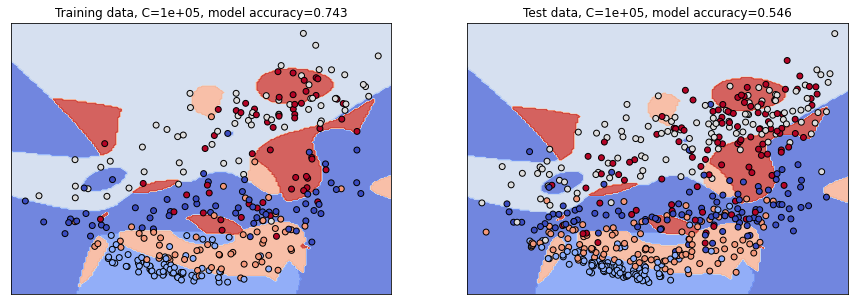

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(C = C, kernel = "rbf", gamma = gamma)
    
    my_svm.fit(X_train_pca, y_train_plot)
    train_error = 1 - my_svm.score(X_train_pca, y_train_plot) 
    test_error = 1 - my_svm.score(X_test_pca, y_test_plot)#ADD CODE FOR TO COMPUTE TRAIN AND TEST ERROR
    
    plot_data(my_svm, X_train_pca, y_train_plot,
              X_test_pca, y_test_plot, train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

### Answer:
We can observe that for small values of $C$, the shape of the boundaries is quite "easy" and well defined. With higher values of $C$ we observe a different situation: the shape of the boundaries becomes much more "disordered" and almost evry region is divided in multiple parts.  

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


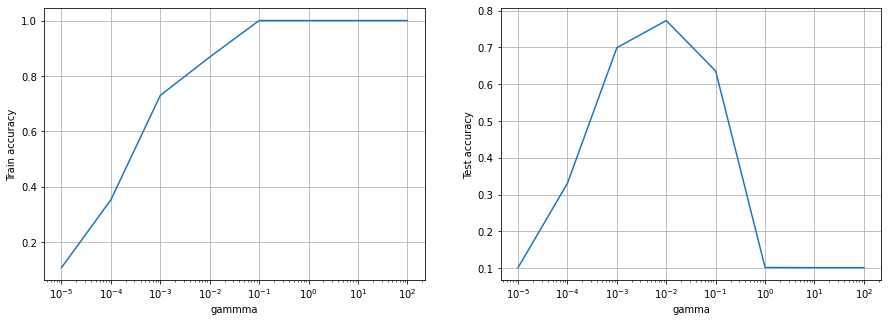

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for gam in gamma_values:
    my_svm1 = SVC(C = 1, kernel = "rbf", gamma = gam)
    my_svm1.fit(X_train, y_train)
    train_acc_list.append(my_svm1.score(X_train, y_train))
    test_acc_list.append(my_svm1.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

### Answer:
- Train error decreases as $\gamma$ increases (in the plot above we have the accuracy) and reaches the value of 0.0 for $\gamma \geq 10^{-1}$.
- Test error decreases for $\gamma < 10^{-2}$ and increases for $\gamma > 10^{-2}$. As we can see from the second plot, $\gamma = 10^{-2}$ is a minimum for the test error (maximum for the accuracy), so we can consider this as the best value of $\gamma$.

When $\gamma$ becomes too large, we have a situation of overfitting. Infact, $\gamma$ is the inverse of the standard deviation $\sigma$ and thus, for high values of $\gamma$ we are considering gaussians with very small variance leading the algorithm to overfit.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [143 171 139 148 150 146 150 125 153 175]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [ ]:
#get training and test error for the best SVM model from CV
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

best_SVM_1_est_obj = SVC(kernel = "rbf")
best_SVM_1 = GridSearchCV(estimator = best_SVM_1_est_obj,
                                 param_grid = parameters, cv = 4)
best_SVM_1.fit(X_train, y_train)

training_error = 1 - best_SVM_1.score(X_train, y_train)
test_error = 1 - best_SVM_1.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [ ]:
from sklearn import linear_model

log_reg = linear_model.LogisticRegression(C=1e7, max_iter = 1000)
log_reg.fit(X_train, y_train)


training_error = 1 - log_reg.score(X_train, y_train)
test_error = 1 - log_reg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

## TO DO 10 Try  with regularization (use C=1)¶

In [ ]:
log_reg = linear_model.LogisticRegression(C=1, max_iter = 1000)
log_reg.fit(X_train, y_train)

training_error = 1 - log_reg.score(X_train, y_train)
test_error = 1 - log_reg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

### Answer:
- With m = 600 we have a train_error = 0.0 and a test_error $\sim$ 0.20. With m = 1500 we have a train_error $\sim$ 0.06 and a test_error $\sim$ 0.18. Therefore we have slightly better results on the test error when using more m_training data (as expected), despite a longer computational time.
- Comparing SVM and LR we can observe that we have very similar results (SVM with m = 600 is very similar to the logistic regression result without regularization and SVM with m = 1500 is similar to the logistic regression with regularization one). Infact SVM results are just a little better for the test terror but the computational time is quite longer than the LR one.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [ ]:
LR_prediction = log_reg.predict(X_test)
SVM_prediction = best_SVM_1.predict(X_test)

d = {"LR_prediction": LR_prediction, "SVM_prediction": SVM_prediction,
     "y_test": y_test}

#create a dataframe with different predictions as columns
df = pd.DataFrame(d)

#check items that are missclassified by logistic regression
#and correctly classified by SVM
df_misclassified = df[(df["LR_prediction"] != df["y_test"])
                      & (df["SVM_prediction"] == df["y_test"])]
print("Dataframe with LR misclassified items:")
display(df_misclassified)

#get an index and plot the item (the first index in this case)
idx = df_misclassified.index[0]
plot_input(X_test,y_test,idx)
print("LR_prediction:", df_misclassified["LR_prediction"][idx])
print("SVM_prediction:", df_misclassified["SVM_prediction"][idx])

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [ ]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)

confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)

In [ ]:
#NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

### Answer
A possible cause of low accuracies could be the fact that there are some clothes that might appear similar so that the algorithm is not able to recognize them correctly.
On the other hand, there are classes which have particular shapes and consequently are difficult to be confused (ankle boot ecc.).